In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>div.container { width:100% !important; }</style>"))

In [1]:
from sklearn.datasets import load_iris
data = load_iris()

In [2]:
X = data.data[:, 2:]
y = data.target
feature_names = data.feature_names[2:]

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
dt_model = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=1,
                                  random_state=0)

In [5]:
dt_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [7]:
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

In [8]:
def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf,
                    feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

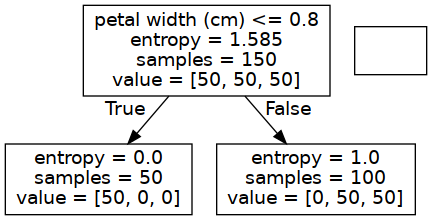

In [11]:
draw_decision_tree(dt_model, feature_names=feature_names)

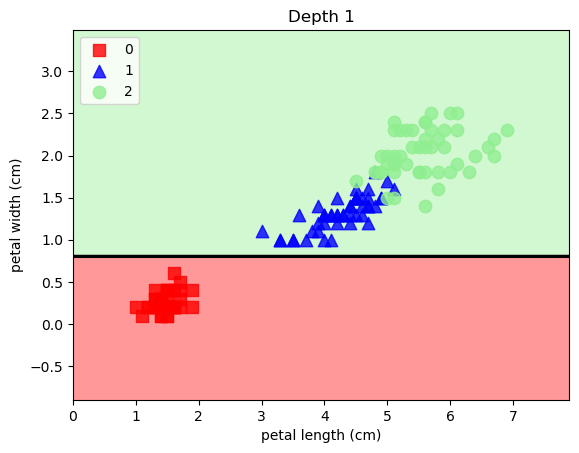

In [12]:
plot_decision_regions(X, y, dt_model, "Depth 1")
plt.show()

In [16]:
# dt_model = DecisionTreeClassifier(criterion='entropy',
#                                   max_depth=1,
#                                   random_state=0)

# max_depth 5
dt_model5 = DecisionTreeClassifier(criterion="entropy",
                                   max_depth=5,
                                   random_state=0)
dt_model5.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

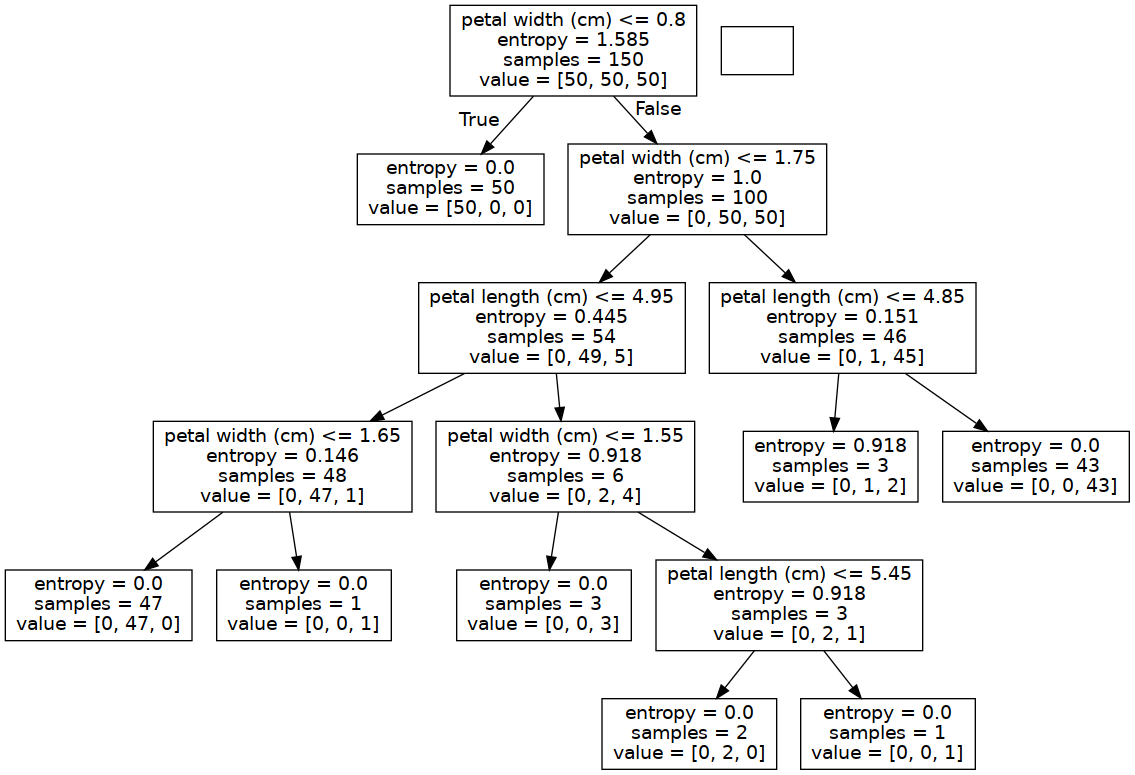

In [14]:
draw_decision_tree(dt_model5, 
                   feature_names=feature_names)

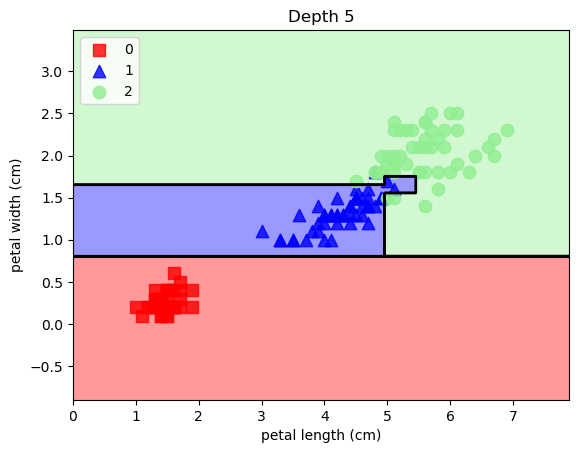

In [15]:
plot_decision_regions(X, y, dt_model5, "Depth 5")
plt.show()